# Import Libraries

This is a GraphQL client for Python 3.6+

In [1]:
# pip install gql[all]
from gql import gql, Client
from gql.transport.aiohttp import AIOHTTPTransport

Other important libraries

In [97]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Changing pandas Dataframe setting

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# Initiate data Import 

In [29]:
#The Graph transport with a defined url endpoint
transport = AIOHTTPTransport(url='https://api.thegraph.com/subgraphs/name/muranox/uniswap-v3-matic')

In [30]:
#create a GraphQL client using the defined transport
client = Client(transport=transport, fetch_schema_from_transport=True)

Query without "first" argument only show 100 where as with "first" argument maximum 1000. We need to run query few times while using "next" to skip already queried data.

In [18]:
#first graphql query
query = gql(
    """
    query getpools {
        pools(
          first:1000, 
          orderBy:createdAtTimestamp, 
          orderDirection:desc
          )
        {
        id
        createdAtTimestamp
        createdAtBlockNumber
        feeTier
        liquidity 
        volumeUSD
        volumeToken0
        volumeToken1
        feesUSD
        }  
    }    
"""
)

In [19]:
#first query result
result = await client.execute_async(query)
print(result)

{'pools': [{'id': '0x42db00ace9490c73831e9f802525eb3fd23eb875', 'createdAtTimestamp': '1644728476', 'createdAtBlockNumber': '24880183', 'feeTier': '10000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'id': '0x13cc978cf4d3026d4529c0c13ee02ca1f95afec1', 'createdAtTimestamp': '1644720449', 'createdAtBlockNumber': '24876521', 'feeTier': '10000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '10.216333', 'volumeToken1': '806.079249576241536799', 'feesUSD': '0'}, {'id': '0x831e76f2524d284d549f398d865e3843a7ea9928', 'createdAtTimestamp': '1644706224', 'createdAtBlockNumber': '24869983', 'feeTier': '3000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'id': '0xa43260fae5dc0c3e3fe1e880b046bc6ec2b43b95', 'createdAtTimestamp': '1644696313', 'createdAtBlockNumber': '24865343', 'feeTier': '10000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {

In [27]:
#second graphql query
query2 = gql(
    """
    query getpools {
        pools(
          first:1000,
          skip:1000,
          orderBy:createdAtTimestamp, 
          orderDirection:desc
          )
        {
        id
        createdAtTimestamp
        createdAtBlockNumber
        feeTier
        liquidity 
        volumeUSD
        volumeToken0
        volumeToken1
        feesUSD
        }  
    }    
"""
)

In [28]:
#second query result
result2 = await client.execute_async(query2)
print(result2)

{'pools': [{'id': '0xbc62ea479c179bdfafb5fc715a72bed7e78db0fd', 'createdAtTimestamp': '1640600489', 'createdAtBlockNumber': '23020139', 'feeTier': '10000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0.9', 'volumeToken1': '7.396995139901889687', 'feesUSD': '0'}, {'id': '0x45a418f783982e55a2b945e2f43e14188f6a8ebf', 'createdAtTimestamp': '1640599941', 'createdAtBlockNumber': '23019873', 'feeTier': '3000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0.8', 'volumeToken1': '195.948260556', 'feesUSD': '0'}, {'id': '0x32c68c5905f0a3c36370c2a050202c86ce3d5ed0', 'createdAtTimestamp': '1640598973', 'createdAtBlockNumber': '23019403', 'feeTier': '3000', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}, {'id': '0xc6bc5660ace84cc2b7941b33a1003ec2da74f27f', 'createdAtTimestamp': '1640598307', 'createdAtBlockNumber': '23019080', 'feeTier': '500', 'liquidity': '0', 'volumeUSD': '0', 'volumeToken0': '0', 'volumeToken1': '0', 'feesUSD': '0'}

In [31]:
#third graphql query
query3 = gql(
    """
    query getpools {
        pools(
          first:1000,
          skip:2000,
          orderBy:createdAtTimestamp, 
          orderDirection:desc
          )
        {
        id
        createdAtTimestamp
        createdAtBlockNumber
        feeTier
        liquidity 
        volumeUSD
        volumeToken0
        volumeToken1
        feesUSD
        }  
    }    
"""
)

In [32]:
#third quert result
result3 = await client.execute_async(query3)
print(result3)

{'pools': []}


# Data Cleaning and Tidying Up

In [217]:
# Check type of data we are dealing 
type(result)

dict

Convert into DataFrame

In [141]:
df  = pd.DataFrame(result['pools'])
df2 = pd.DataFrame(result2['pools'])

Statistical info

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   object
 1   createdAtTimestamp    1000 non-null   object
 2   createdAtBlockNumber  1000 non-null   object
 3   feeTier               1000 non-null   object
 4   liquidity             1000 non-null   object
 5   volumeUSD             1000 non-null   object
 6   volumeToken0          1000 non-null   object
 7   volumeToken1          1000 non-null   object
 8   feesUSD               1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    419 non-null    object
 1   createdAtTimestamp    419 non-null    object
 2   createdAtBlockNumber  419 non-null    object
 3   feeTier               419 non-null    object
 4   liquidity             419 non-null    object
 5   volumeUSD             419 non-null    object
 6   volumeToken0          419 non-null    object
 7   volumeToken1          419 non-null    object
 8   feesUSD               419 non-null    object
dtypes: object(9)
memory usage: 29.6+ KB


Concatenate DataFrames

In [144]:
bigdata = df.append(df2, ignore_index=True)

In [145]:
bigdata

,id,createdAtTimestamp,createdAtBlockNumber,feeTier,liquidity,volumeUSD,volumeToken0,volumeToken1,feesUSD
0,0x42db00ace9490c73831e9f802525eb3fd23eb875,1644728476,24880183,10000,0,0,0,0,0
1,0x13cc978cf4d3026d4529c0c13ee02ca1f95afec1,1644720449,24876521,10000,0,0,10.216333,806.079249576241536799,0
2,0x831e76f2524d284d549f398d865e3843a7ea9928,1644706224,24869983,3000,0,0,0,0,0
3,0xa43260fae5dc0c3e3fe1e880b046bc6ec2b43b95,1644696313,24865343,10000,0,0,0,0,0
4,0xf414ff96561d116bedd5ca97b25bf171ea02210e,1644695385,24864893,3000,0,0,0,0,0
5,0x2cb24c2c73579ac99255fe1aa3a556f36ca862f2,1644686688,24860894,3000,74607550043793,0,0.599586,4.180330830708459575,0
6,0x0d996e995a13ab150b1ddf4b2a7b9277368c3ff0,1644675663,24855769,10000,992375213621111884981549714,0,101.546620723539351052,10000,0
7,0xe3bbdbe423457728b4d7205232c29b6fc28e37fc,1644670338,24853326,3000,0,0,0,0,0
8,0xf8c27579685957f6e427a06272981cd7cc8e3833,1644662682,24849739,10000,0,0,0.824290654327752003,1103.106594045,0
9,0x92071e385cd49fa5aa7b9fdfe76a082621004fb0,1644661454,24849207,10000,0,0,0,0,0


In [147]:
# Column names
bigdata.columns

Index(['id', 'createdAtTimestamp', 'createdAtBlockNumber', 'feeTier',
       'liquidity', 'volumeUSD', 'volumeToken0', 'volumeToken1', 'feesUSD'],
      dtype='object')

Change data type of the columns

In [148]:
bigdata[['createdAtTimestamp','createdAtBlockNumber', 'feeTier','liquidity', 'volumeUSD', 'volumeToken0', 'volumeToken1', 'feesUSD']] = bigdata[['createdAtTimestamp','createdAtBlockNumber', 'feeTier','liquidity', 'volumeUSD', 'volumeToken0', 'volumeToken1', 'feesUSD']].apply(pd.to_numeric,errors= 'coerce')

In [149]:
# Change "Time" column into datetime object
bigdata['Time'] = bigdata.createdAtTimestamp.apply(lambda row: datetime.utcfromtimestamp(row).strftime('%Y-%m-%d'))

datetime.datetime.utcfromtimestamp(posix_time).strftime('%Y-%m-%dT%H:%M:%SZ')

datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [150]:
# Look over data
bigdata

,id,createdAtTimestamp,createdAtBlockNumber,feeTier,liquidity,volumeUSD,volumeToken0,volumeToken1,feesUSD,Time
0,0x42db00ace9490c73831e9f802525eb3fd23eb875,1644728476,24880183,10000,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-13
1,0x13cc978cf4d3026d4529c0c13ee02ca1f95afec1,1644720449,24876521,10000,0.000000e+00,0,1.021633e+01,8.060792e+02,0,2022-02-13
2,0x831e76f2524d284d549f398d865e3843a7ea9928,1644706224,24869983,3000,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-12
3,0xa43260fae5dc0c3e3fe1e880b046bc6ec2b43b95,1644696313,24865343,10000,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-12
4,0xf414ff96561d116bedd5ca97b25bf171ea02210e,1644695385,24864893,3000,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-12
5,0x2cb24c2c73579ac99255fe1aa3a556f36ca862f2,1644686688,24860894,3000,7.460755e+13,0,5.995860e-01,4.180331e+00,0,2022-02-12
6,0x0d996e995a13ab150b1ddf4b2a7b9277368c3ff0,1644675663,24855769,10000,9.923752e+26,0,1.015466e+02,1.000000e+04,0,2022-02-12
7,0xe3bbdbe423457728b4d7205232c29b6fc28e37fc,1644670338,24853326,3000,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-12
8,0xf8c27579685957f6e427a06272981cd7cc8e3833,1644662682,24849739,10000,0.000000e+00,0,8.242907e-01,1.103107e+03,0,2022-02-12
9,0x92071e385cd49fa5aa7b9fdfe76a082621004fb0,1644661454,24849207,10000,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-12


# Data Wrangling

In [151]:
# Quick look over bigdata after coverting respective datatypes 
bigdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1419 entries, 0 to 1418
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1419 non-null   object 
 1   createdAtTimestamp    1419 non-null   int64  
 2   createdAtBlockNumber  1419 non-null   int64  
 3   feeTier               1419 non-null   int64  
 4   liquidity             1419 non-null   float64
 5   volumeUSD             1419 non-null   int64  
 6   volumeToken0          1419 non-null   float64
 7   volumeToken1          1419 non-null   float64
 8   feesUSD               1419 non-null   int64  
 9   Time                  1419 non-null   object 
dtypes: float64(3), int64(5), object(2)
memory usage: 111.0+ KB


In [152]:
# Statistical information
bigdata.describe()

,createdAtTimestamp,createdAtBlockNumber,feeTier,liquidity,volumeUSD,volumeToken0,volumeToken1,feesUSD
count,1.419000e+03,1.419000e+03,1419.000000,1.419000e+03,1419.0,1.419000e+03,1.419000e+03,1419.0
mean,1.641927e+09,2.361392e+07,5694.150810,3.398440e+27,0.0,7.309657e+11,8.048295e+11,0.0
std,1.472885e+06,6.621192e+05,4053.699963,9.422564e+28,0.0,1.943937e+13,2.879956e+13,0.0
min,1.640023e+09,2.275791e+07,500.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
25%,1.640523e+09,2.298540e+07,3000.000000,0.000000e+00,0.0,2.206405e-03,1.000000e-02,0.0
50%,1.641722e+09,2.351323e+07,3000.000000,0.000000e+00,0.0,8.277396e+00,2.826924e+01,0.0
75%,1.643395e+09,2.427486e+07,10000.000000,9.910251e+17,0.0,1.417588e+03,8.508117e+03,0.0
max,1.644728e+09,2.488018e+07,10000.000000,3.144772e+30,0.0,5.759156e+14,1.083851e+15,0.0


Findings from above:-
1. Columns with no values- volumeUSD, feesUSD
2. Columns with outliers - liquidity, volumeToken0, volumeToken1

In [155]:
# FeeTier column exploring
bigdata.feeTier.unique()

array([10000,  3000,   500], dtype=int64)

Fee tier 0.05% for maximum fee tier(10000) is 500.
Data with fee tier of 500 named as "bigdata_feetier500"

In [157]:
# Lock dataframe for feeTier==500 
bigdata_feetier500 = bigdata.loc[bigdata['feeTier']==500]
bigdata_feetier500

,id,createdAtTimestamp,createdAtBlockNumber,feeTier,liquidity,volumeUSD,volumeToken0,volumeToken1,feesUSD,Time
12,0x3bc4e5c778ad91f6023d799bf233981997bc6678,1644646236,24842299,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-12
27,0xe75650b6db4c2fe586290825859c9e2dd6f3cd9d,1644567739,24806771,500,0.000000e+00,0,1.533590e+00,4.633342e+00,0,2022-02-11
30,0x26eb769783b4c77d95b9111b619146c0416185c1,1644561652,24804106,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-11
32,0xb1b3c6ec166d031e99d4ece4f0ffd3102da0126e,1644560510,24803568,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-11
34,0xd9b24efcb43becee0a1a08c4baac1ca0b6c1c730,1644522468,24787128,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-10
43,0x56fba3a846ade89ff4ec33aa6939ad8ab847d906,1644488791,24771921,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-10
44,0x3c9108d658d65e47aab48dab1b36e2f6c6163647,1644473367,24764865,500,0.000000e+00,0,1.000000e+05,3.927192e+04,0,2022-02-10
51,0xabc0f1ca6491796b62f6f89d18d04a7b88e9f86b,1644455051,24756235,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-10
56,0x048f1c02985e86835db746d75aa7ddcc83b51926,1644436979,24747918,500,0.000000e+00,0,0.000000e+00,0.000000e+00,0,2022-02-09
57,0xb283fb06b3c3585beadf955e9fc8ee8627f8ea1c,1644426967,24743250,500,1.034596e+19,0,3.658824e+01,7.317908e+05,0,2022-02-09


## Explore the data

Group the data by average for a day

In [158]:
finaldata = bigdata_feetier500.groupby('Time').mean(['liquidity','volumeUSD','volumeToken0','volumeToken1'])
finaldata

,createdAtTimestamp,createdAtBlockNumber,feeTier,liquidity,volumeUSD,volumeToken0,volumeToken1,feesUSD
Time,,,,,,,,
2021-12-20,1.640040e+09,2.276596e+07,500.0,1.190705e+18,0.0,1.535286e+09,5.145094e+05,0.0
2021-12-21,1.640115e+09,2.280036e+07,500.0,3.614130e+22,0.0,7.879584e+07,8.800709e+07,0.0
2021-12-22,1.640198e+09,2.283806e+07,500.0,1.315961e+26,0.0,1.615943e+07,1.627042e+07,0.0
2021-12-23,1.640249e+09,2.286126e+07,500.0,2.183901e+20,0.0,2.914372e+05,1.414831e+06,0.0
2021-12-24,1.640356e+09,2.290951e+07,500.0,1.280145e+20,0.0,1.467677e+05,3.592493e+05,0.0
2021-12-25,1.640435e+09,2.294527e+07,500.0,2.392537e+18,0.0,5.074204e+05,5.988207e+07,0.0
2021-12-26,1.640547e+09,2.299589e+07,500.0,1.141894e+20,0.0,2.119524e+04,7.558994e+05,0.0
2021-12-27,1.640615e+09,2.302675e+07,500.0,3.707197e+23,0.0,7.336817e+04,1.983587e+05,0.0
2021-12-28,1.640699e+09,2.306526e+07,500.0,5.011419e+25,0.0,3.831285e+06,4.998722e+09,0.0


In [90]:
# Statistical information
finaldata.describe()

,createdAtTimestamp,createdAtBlockNumber,feeTier,liquidity,volumeUSD,volumeToken0,volumeToken1,feesUSD
count,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,56.0,5.600000e+01,5.600000e+01,56.0
mean,1.642382e+09,2.381770e+07,5546.350127,4.544002e+27,0.0,4.691402e+11,8.408904e+11,0.0
std,1.405823e+06,6.328055e+05,1472.826810,2.388095e+28,0.0,3.095289e+12,5.799964e+12,0.0
min,1.640032e+09,2.276206e+07,1333.333333,0.000000e+00,0.0,5.108167e+00,7.386559e+01,0.0
25%,1.641190e+09,2.328954e+07,4557.020670,2.864119e+21,0.0,1.286444e+04,2.641459e+05,0.0
50%,1.642376e+09,2.380492e+07,5820.964247,3.650867e+22,0.0,1.123917e+05,1.431277e+06,0.0
75%,1.643568e+09,2.435279e+07,6305.059524,1.917733e+24,0.0,1.848717e+06,9.782763e+07,0.0
max,1.644724e+09,2.487835e+07,10000.000000,1.429515e+29,0.0,2.303663e+13,4.335415e+13,0.0


In [122]:
finaldata.columns

Index(['createdAtTimestamp', 'createdAtBlockNumber', 'feeTier', 'liquidity',
       'volumeUSD', 'volumeToken0', 'volumeToken1', 'feesUSD'],
      dtype='object')

### Exploring the outliers

#### Liquidity

C:\Users\GL552VW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GL552VW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


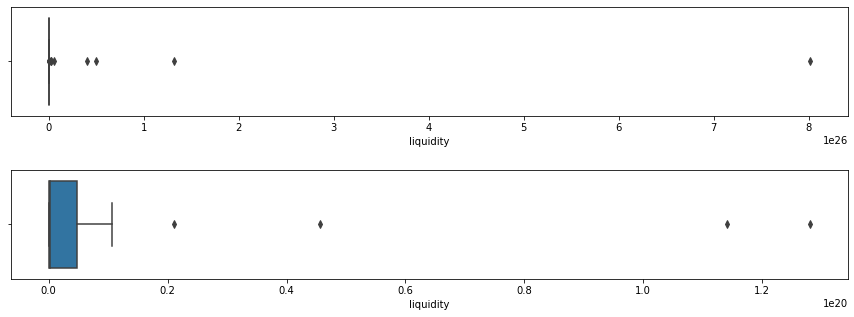

In [182]:
plt.figure(figsize=(15,5))
ax = plt.subplot(2,1,1)
sns.boxplot(finaldata['liquidity'])
ax = plt.subplot(2,1,2)
sns.boxplot(finaldata.liquidity.loc[finaldata.liquidity<np.quantile(finaldata.liquidity,0.65)])
plt.subplots_adjust(hspace=0.5)

#### volumeUSD

Since volumeUSD column is zero there is no need to plot boxplot

#### volumeToken0

C:\Users\GL552VW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GL552VW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


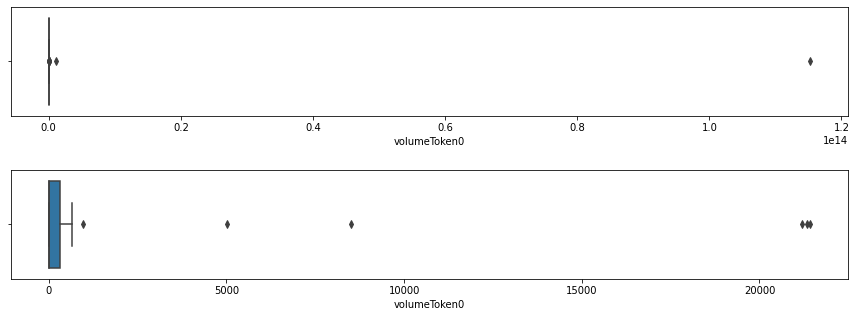

In [183]:
plt.figure(figsize=(15,5))
ax = plt.subplot(2,1,1)
sns.boxplot(finaldata['volumeToken0'])
ax = plt.subplot(2,1,2)
sns.boxplot(finaldata.volumeToken0.loc[finaldata.volumeToken0<np.quantile(finaldata.volumeToken0,0.65)])
plt.subplots_adjust(hspace=0.5)

#### VolumeToken1

C:\Users\GL552VW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GL552VW\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


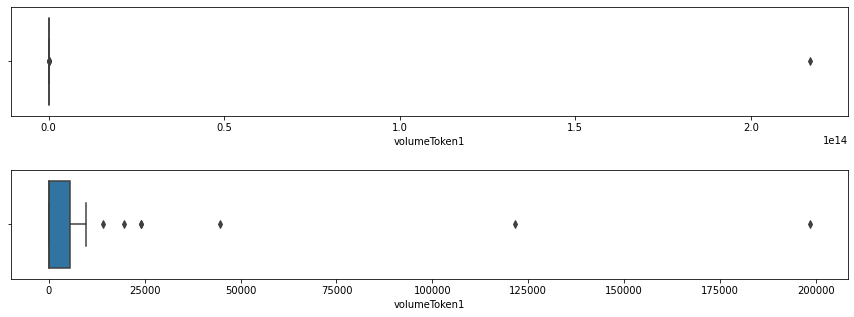

In [184]:
plt.figure(figsize=(15,5))
ax = plt.subplot(2,1,1)
sns.boxplot(finaldata['volumeToken1'])
ax = plt.subplot(2,1,2)
sns.boxplot(finaldata.volumeToken1.loc[finaldata.volumeToken1<np.quantile(finaldata.volumeToken1,0.65)])
plt.subplots_adjust(hspace=0.5)

## Plotting the graphs as asked in assignment 

## Visualization

## 1.Liquidity

<Figure size 432x288 with 0 Axes>

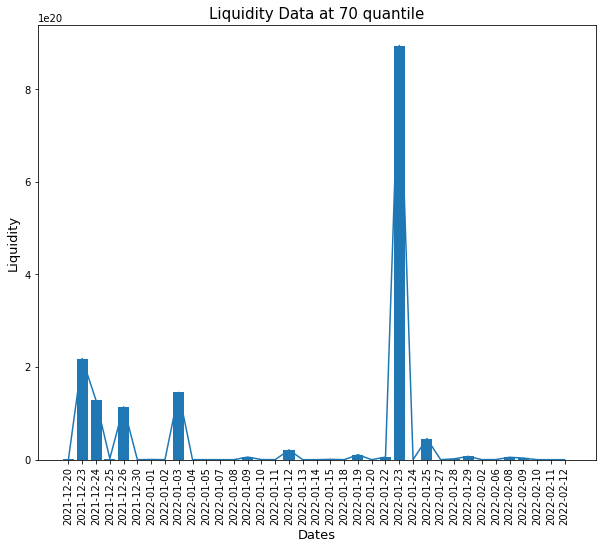

In [211]:
plt.clf()
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(finaldata.liquidity.loc[finaldata.liquidity<np.quantile(finaldata.liquidity,0.7)])
plt.bar(range(len(finaldata.liquidity.loc[finaldata.liquidity<np.quantile(finaldata.liquidity,0.7)])), finaldata.liquidity.loc[finaldata.liquidity<np.quantile(finaldata.liquidity,0.7)])
plt.xlabel('Dates',fontsize=13)
plt.ylabel('Liquidity',fontsize=13)
plt.title('Liquidity Data at 70 quantile', fontsize=15)
ax.tick_params(axis='x',labelrotation=90)

## 2. volumeUSD

## 3. volumeToken0

<Figure size 432x288 with 0 Axes>

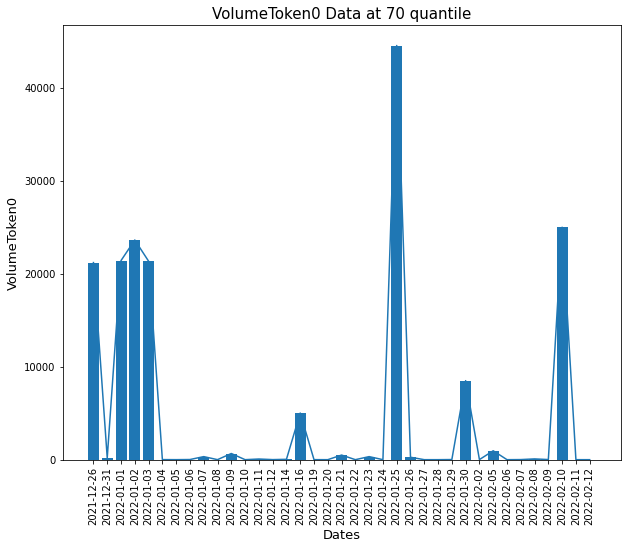

In [215]:
plt.clf()
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(finaldata.volumeToken0.loc[finaldata.volumeToken0<np.quantile(finaldata.volumeToken0,0.7)])
plt.bar(range(len(finaldata.volumeToken0.loc[finaldata.volumeToken0<np.quantile(finaldata.volumeToken0,0.7)])), finaldata.volumeToken0.loc[finaldata.volumeToken0<np.quantile(finaldata.volumeToken0,0.7)])
plt.xlabel('Dates',fontsize=13)
plt.ylabel('VolumeToken0',fontsize=13)
plt.title('VolumeToken0 Data at 70 quantile', fontsize=15)
ax.tick_params(axis='x',labelrotation=90)

## 4.volumeToken1

<Figure size 432x288 with 0 Axes>

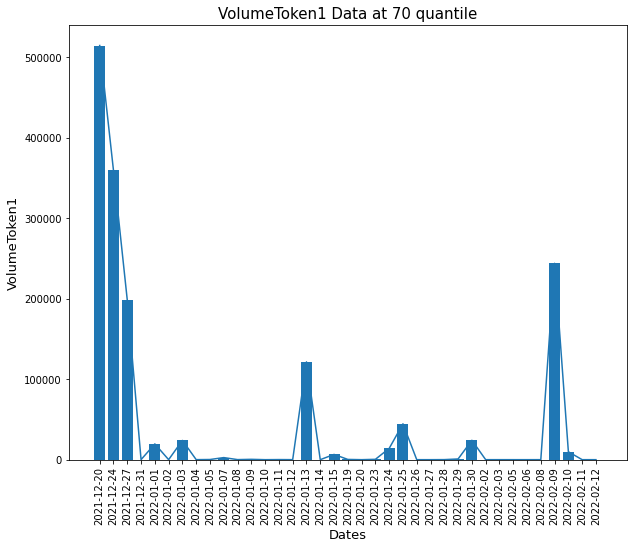

In [216]:
plt.clf()
plt.figure(figsize=(10,8))
ax = plt.subplot()
plt.plot(finaldata.volumeToken1.loc[finaldata.volumeToken1<np.quantile(finaldata.volumeToken1,0.7)])
plt.bar(range(len(finaldata.volumeToken1.loc[finaldata.volumeToken1<np.quantile(finaldata.volumeToken1,0.7)])), finaldata.volumeToken1.loc[finaldata.volumeToken1<np.quantile(finaldata.volumeToken1,0.7)])
plt.xlabel('Dates',fontsize=13)
plt.ylabel('VolumeToken1',fontsize=13)
plt.title('VolumeToken1 Data at 70 quantile', fontsize=15)
ax.tick_params(axis='x',labelrotation=90)